# Walmart Sales Analysis

**Project Overview**

This project aims to analyze Walmart's sales data to gain insights into customer behavior, product performance, and demand forecasting. By leveraging Python for data analysis, we will clean the dataset, perform exploratory data analysis (EDA), and derive key business insights. Additionally, we will assess how external factors like promotions and weather conditions impact sales.

In [75]:
#Importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [76]:
#loading dataset
data= pd.read_csv("Walmart.csv") 
data

,transaction_id,customer_id,product_id,product_name,category,quantity_sold,unit_price,transaction_date,store_id,store_location,...,customer_loyalty_level,payment_method,promotion_applied,promotion_type,weather_conditions,holiday_indicator,weekday,stockout_indicator,forecasted_demand,actual_demand
0,1,2824,843,Fridge,Electronics,3,188.46,3/31/2024 21:46,3,"Miami, FL",...,Silver,Credit Card,True,NaN,Stormy,False,Friday,True,172,179
1,2,1409,135,TV,Electronics,4,1912.04,7/28/2024 12:45,5,"Dallas, TX",...,Gold,Cash,True,Percentage Discount,Rainy,False,Monday,True,109,484
2,3,5506,391,Fridge,Electronics,4,1377.75,6/10/2024 4:55,1,"Los Angeles, CA",...,Platinum,Cash,False,NaN,Sunny,False,Tuesday,True,289,416
3,4,5012,710,Smartphone,Electronics,5,182.31,8/15/2024 1:03,5,"Miami, FL",...,Silver,Cash,True,Percentage Discount,Sunny,True,Sunday,False,174,446
4,5,4657,116,Laptop,Electronics,3,499.28,9/13/2024 0:45,6,"Chicago, IL",...,Bronze,Digital Wallet,False,NaN,Sunny,False,Thursday,True,287,469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,6898,852,Headphones,Appliances,1,682.15,7/8/2024 6:13,17,"New York, NY",...,Gold,Cash,False,NaN,Sunny,False,Wednesday,True,257,294
4996,4997,8412,886,Laptop,Appliances,3,1418.09,2/7/2024 11:30,16,"Los Angeles, CA",...,Bronze,Digital Wallet,True,NaN,Sunny,True,Sunday,True,388,397
4997,4998,8331,934,Fridge,Electronics,5,398.66,8/20/2024 0:38,16,"New York, NY",...,Bronze,Digital Wallet,True,NaN,Cloudy,False,Thursday,True,314,204
4998,4999,7505,439,Laptop,Appliances,3,1000.95,8/26/2024 11:05,16,"Miami, FL",...,Silver,Debit Card,True,NaN,Stormy,False,Tuesday,False,488,144


### Data Preprocessing

In [77]:
data.shape

(5000, 28)

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_id          5000 non-null   int64  
 1   customer_id             5000 non-null   int64  
 2   product_id              5000 non-null   int64  
 3   product_name            5000 non-null   object 
 4   category                5000 non-null   object 
 5   quantity_sold           5000 non-null   int64  
 6   unit_price              5000 non-null   float64
 7   transaction_date        5000 non-null   object 
 8   store_id                5000 non-null   int64  
 9   store_location          5000 non-null   object 
 10  inventory_level         5000 non-null   int64  
 11  reorder_point           5000 non-null   int64  
 12  reorder_quantity        5000 non-null   int64  
 13  supplier_id             5000 non-null   int64  
 14  supplier_lead_time      5000 non-null   

In [79]:
#Summary Statistics
data.describe()

,transaction_id,customer_id,product_id,quantity_sold,unit_price,store_id,inventory_level,reorder_point,reorder_quantity,supplier_id,supplier_lead_time,customer_age,customer_income,forecasted_demand,actual_demand
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,5542.497200,551.233400,2.982800,1023.467294,10.525000,253.121800,99.788000,200.517000,300.12560,5.523000,44.124000,70041.627846,297.134000,299.08840
std,1443.520003,2582.126997,258.826606,1.419474,559.614242,5.786888,142.885456,29.132387,58.257381,116.39486,2.863549,15.329358,29053.371736,115.568806,121.68078
min,1.000000,1001.000000,100.000000,1.000000,50.100000,1.000000,0.000000,50.000000,100.000000,100.00000,1.000000,18.000000,20005.340000,100.000000,90.00000
25%,1250.750000,3279.000000,322.000000,2.000000,537.775000,5.000000,130.000000,75.000000,150.750000,199.00000,3.000000,31.000000,44865.417500,195.000000,194.00000
50%,2500.500000,5558.000000,559.000000,3.000000,1029.175000,11.000000,253.000000,100.000000,200.500000,299.00000,6.000000,44.000000,70188.290000,297.500000,299.00000
75%,3750.250000,7767.250000,776.000000,4.000000,1506.307500,16.000000,377.250000,125.000000,251.000000,405.00000,8.000000,58.000000,95395.872500,395.000000,404.00000
max,5000.000000,9998.000000,999.000000,5.000000,1999.850000,20.000000,500.000000,150.000000,300.000000,500.00000,10.000000,70.000000,119999.780000,500.000000,510.00000


In [80]:
#Checking missing values
data.isnull().sum()

transaction_id               0
customer_id                  0
product_id                   0
product_name                 0
category                     0
quantity_sold                0
unit_price                   0
transaction_date             0
store_id                     0
store_location               0
inventory_level              0
reorder_point                0
reorder_quantity             0
supplier_id                  0
supplier_lead_time           0
customer_age                 0
customer_gender              0
customer_income              0
customer_loyalty_level       0
payment_method               0
promotion_applied            0
promotion_type            3407
weather_conditions           0
holiday_indicator            0
weekday                      0
stockout_indicator           0
forecasted_demand            0
actual_demand                0
dtype: int64

In [81]:
data['promotion_type'].unique()

array([nan, 'Percentage Discount', 'BOGO'], dtype=object)

In [82]:
#Handling missing values
data['promotion_type']=data['promotion_type'].fillna('None')

In [83]:
data.isnull().sum()

transaction_id            0
customer_id               0
product_id                0
product_name              0
category                  0
quantity_sold             0
unit_price                0
transaction_date          0
store_id                  0
store_location            0
inventory_level           0
reorder_point             0
reorder_quantity          0
supplier_id               0
supplier_lead_time        0
customer_age              0
customer_gender           0
customer_income           0
customer_loyalty_level    0
payment_method            0
promotion_applied         0
promotion_type            0
weather_conditions        0
holiday_indicator         0
weekday                   0
stockout_indicator        0
forecasted_demand         0
actual_demand             0
dtype: int64

In [84]:
data.dtypes

transaction_id              int64
customer_id                 int64
product_id                  int64
product_name               object
category                   object
quantity_sold               int64
unit_price                float64
transaction_date           object
store_id                    int64
store_location             object
inventory_level             int64
reorder_point               int64
reorder_quantity            int64
supplier_id                 int64
supplier_lead_time          int64
customer_age                int64
customer_gender            object
customer_income           float64
customer_loyalty_level     object
payment_method             object
promotion_applied            bool
promotion_type             object
weather_conditions         object
holiday_indicator            bool
weekday                    object
stockout_indicator           bool
forecasted_demand           int64
actual_demand               int64
dtype: object

In [85]:
#Changing data type of transaction_date column
data['transaction_date'] = pd.to_datetime(data['transaction_date'])


In [86]:
#Adding total_sales column
data['total_sales'] = data['quantity_sold'] * data['unit_price']
data

,transaction_id,customer_id,product_id,product_name,category,quantity_sold,unit_price,transaction_date,store_id,store_location,...,payment_method,promotion_applied,promotion_type,weather_conditions,holiday_indicator,weekday,stockout_indicator,forecasted_demand,actual_demand,total_sales
0,1,2824,843,Fridge,Electronics,3,188.46,2024-03-31 21:46:00,3,"Miami, FL",...,Credit Card,True,None,Stormy,False,Friday,True,172,179,565.38
1,2,1409,135,TV,Electronics,4,1912.04,2024-07-28 12:45:00,5,"Dallas, TX",...,Cash,True,Percentage Discount,Rainy,False,Monday,True,109,484,7648.16
2,3,5506,391,Fridge,Electronics,4,1377.75,2024-06-10 04:55:00,1,"Los Angeles, CA",...,Cash,False,None,Sunny,False,Tuesday,True,289,416,5511.00
3,4,5012,710,Smartphone,Electronics,5,182.31,2024-08-15 01:03:00,5,"Miami, FL",...,Cash,True,Percentage Discount,Sunny,True,Sunday,False,174,446,911.55
4,5,4657,116,Laptop,Electronics,3,499.28,2024-09-13 00:45:00,6,"Chicago, IL",...,Digital Wallet,False,None,Sunny,False,Thursday,True,287,469,1497.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,6898,852,Headphones,Appliances,1,682.15,2024-07-08 06:13:00,17,"New York, NY",...,Cash,False,None,Sunny,False,Wednesday,True,257,294,682.15
4996,4997,8412,886,Laptop,Appliances,3,1418.09,2024-02-07 11:30:00,16,"Los Angeles, CA",...,Digital Wallet,True,None,Sunny,True,Sunday,True,388,397,4254.27
4997,4998,8331,934,Fridge,Electronics,5,398.66,2024-08-20 00:38:00,16,"New York, NY",...,Digital Wallet,True,None,Cloudy,False,Thursday,True,314,204,1993.30
4998,4999,7505,439,Laptop,Appliances,3,1000.95,2024-08-26 11:05:00,16,"Miami, FL",...,Debit Card,True,None,Stormy,False,Tuesday,False,488,144,3002.85


### Exploratory Data Analysis (EDA)

In [87]:
data.columns

Index(['transaction_id', 'customer_id', 'product_id', 'product_name',
       'category', 'quantity_sold', 'unit_price', 'transaction_date',
       'store_id', 'store_location', 'inventory_level', 'reorder_point',
       'reorder_quantity', 'supplier_id', 'supplier_lead_time', 'customer_age',
       'customer_gender', 'customer_income', 'customer_loyalty_level',
       'payment_method', 'promotion_applied', 'promotion_type',
       'weather_conditions', 'holiday_indicator', 'weekday',
       'stockout_indicator', 'forecasted_demand', 'actual_demand',
       'total_sales'],
      dtype='object')

In [88]:
data['quantity_sold'].sum() 
print("Total Number of quantity sold: ",data['quantity_sold'].sum())

Total Number of quantity sold:  14914


In [89]:
average_price=data.groupby('product_name')['unit_price'].mean().sort_values() 
average_price

product_name
Fridge              993.185954
Tablet              996.608253
Camera             1015.638312
Laptop             1018.981159
Headphones         1022.561726
Smartphone         1038.293276
Washing Machine    1052.249837
TV                 1052.523066
Name: unit_price, dtype: float64

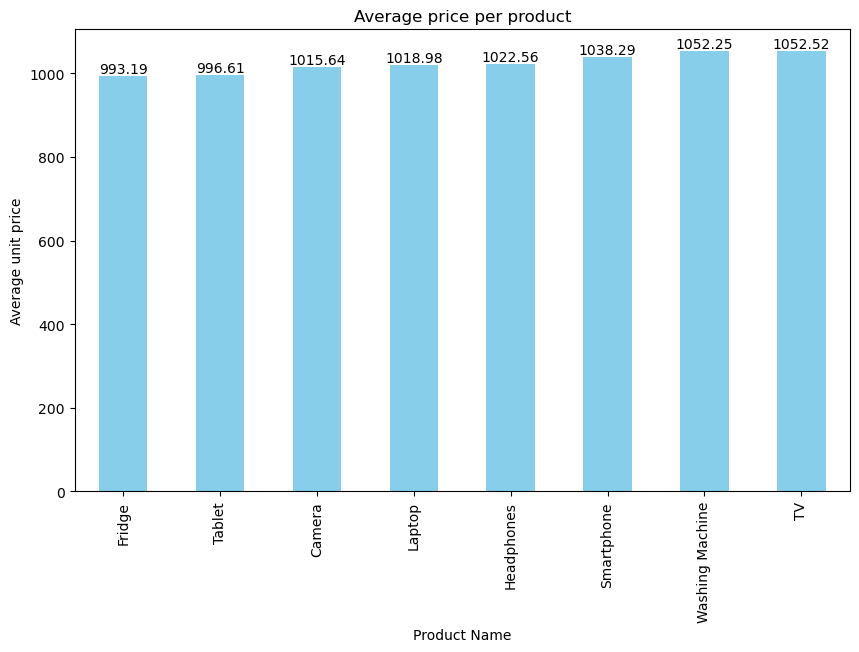

In [90]:
#Plotting a bar plot of Average price per product
plt.figure(figsize=(10,6)) 
bars=average_price.plot(kind='bar',color='skyblue')
plt.title('Average price per product') 
plt.xlabel('Product Name') 
plt.ylabel('Average unit price') 
plt.xticks(rotation=90) 
#Adding labels to the bars in the barplot
for container in bars.containers:
    bars.bar_label(container,fmt='%.2f') 
plt.show()

In [91]:
#Monthly Sales trend
monthly_sales_trend = data.groupby(data['transaction_date'].dt.to_period("M"))['total_sales'].sum()


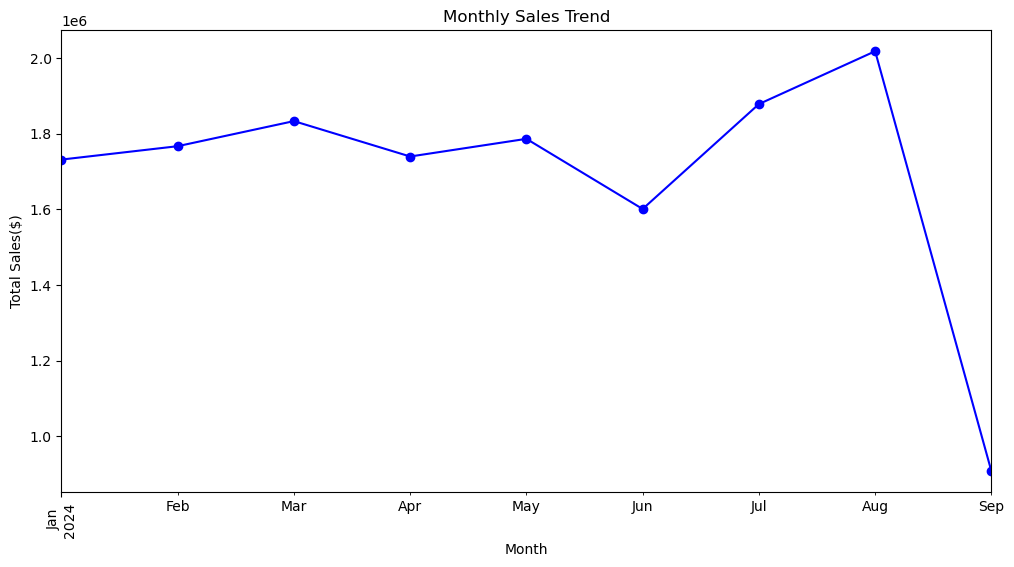

In [92]:
#Monthly sales trend analysis using lineplot
plt.figure(figsize=(12, 6))
monthly_sales_trend.plot(marker='o', linestyle='-', color='b')
plt.xlabel("Month")
plt.ylabel("Total Sales($)")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=90)
plt.show()

**From the above lineplot we can clearly see that total sale is highest for August month and lowest for September month.**

In [93]:
#Sales analysis by store
sales_by_store=data.groupby('store_location')['total_sales'].sum().sort_values() 
sales_by_store

store_location
Dallas, TX         2903930.74
Miami, FL          2962567.02
New York, NY       2964077.24
Chicago, IL        3156726.82
Los Angeles, CA    3276299.63
Name: total_sales, dtype: float64

In [94]:
#Checking underperforming stores
threshold=sales_by_store.median() 
underperforming_stores=sales_by_store[sales_by_store<threshold] 
print("Underperforming stores:")
print(underperforming_stores) 

Underperforming stores:
store_location
Dallas, TX    2903930.74
Miami, FL     2962567.02
Name: total_sales, dtype: float64


**Dallas and Miami are the underperforming store location.**

In [95]:
#Sales analysis by Product Category 
sales_by_category=data.groupby('category')['total_sales'].sum().sort_values() 
sales_by_category

category
Appliances     7321969.65
Electronics    7941631.80
Name: total_sales, dtype: float64

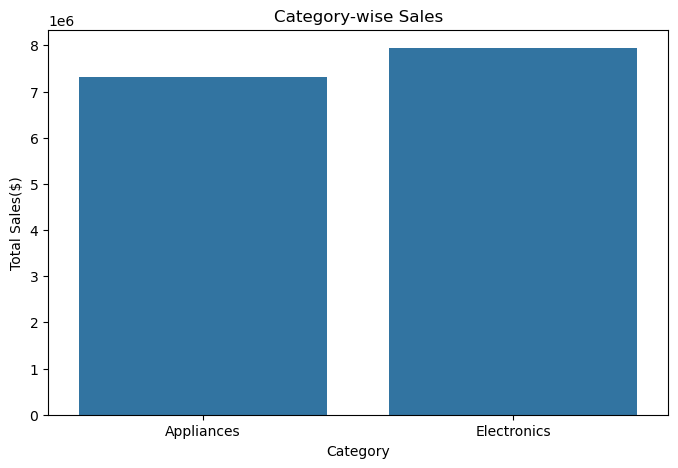

In [96]:
#Plotting bar plot of Product Category wise Sales 
plt.figure(figsize=(8, 5))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values)
plt.xlabel("Category")
plt.ylabel("Total Sales($)")
plt.title("Category-wise Sales")
plt.show()

**From the above bar plot we can see that electronics product sale is higher than other household appliances sale.** 

In [97]:
#Sales Analysis by customer loyalty level
sales_by_customer_loyalty=data.groupby('customer_loyalty_level')['total_sales'].sum().sort_values() 
sales_by_customer_loyalty

customer_loyalty_level
Gold        3536863.54
Bronze      3795198.45
Silver      3918576.32
Platinum    4012963.14
Name: total_sales, dtype: float64

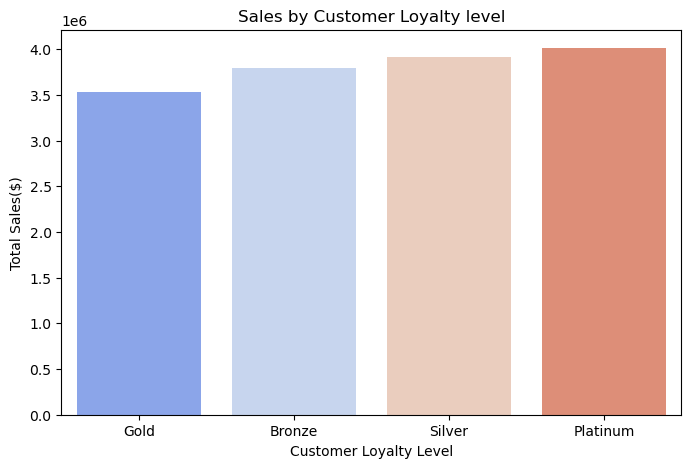

In [98]:
#Plotting barplot of Sales vs Customer Loyalty level
plt.figure(figsize=(8, 5))
sns.barplot(x=sales_by_customer_loyalty.index, y=sales_by_customer_loyalty.values,hue=sales_by_customer_loyalty.index,palette='coolwarm',legend=False)
plt.xlabel("Customer Loyalty Level")
plt.ylabel("Total Sales($)")
plt.title("Sales by Customer Loyalty level")
plt.show()

**From the above barplot we can see Platinum tier customer spend the most.**

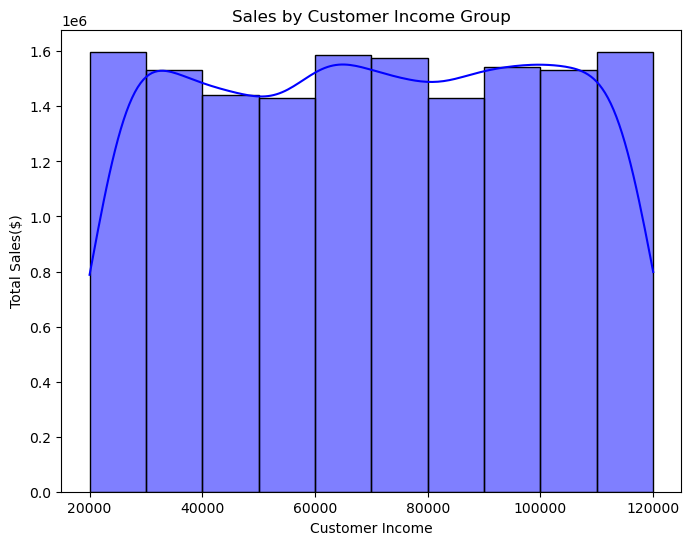

In [99]:
#Histogram of Customer Income group
plt.figure(figsize=(8,6)) 
sns.histplot(data,x='customer_income',weights='total_sales',bins=10,kde=True,color='blue') 
plt.xlabel("Customer Income")
plt.ylabel("Total Sales($)")
plt.title("Sales by Customer Income Group")
plt.show()

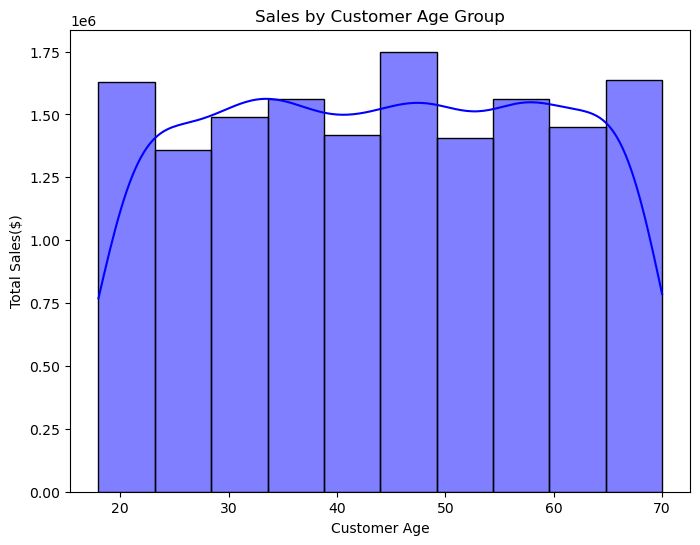

In [100]:
#Histogram of Customer Age group 
plt.figure(figsize=(8,6)) 
sns.histplot(data,x='customer_age',weights='total_sales',bins=10,kde=True,color='blue') 
plt.xlabel("Customer Age")
plt.ylabel("Total Sales($)")
plt.title("Sales by Customer Age Group")
plt.show()

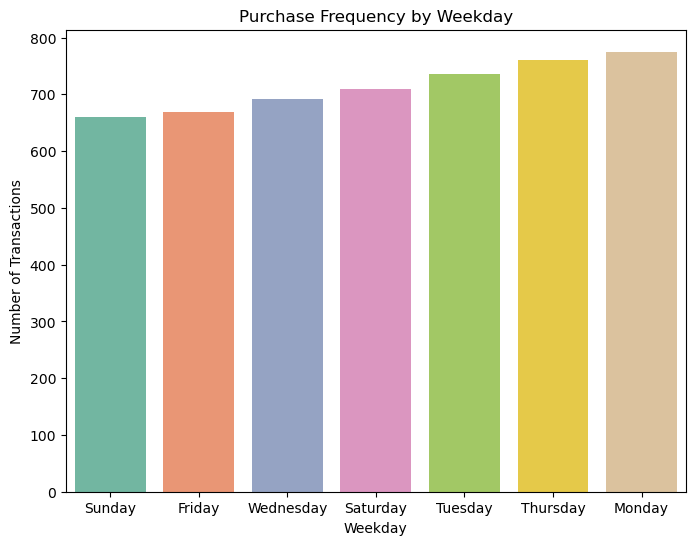

In [101]:
#Purchase frequency by weekday
weekday_counts = data['weekday'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).sort_values()
plt.figure(figsize=(8, 6))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values,hue=weekday_counts.index,legend=False, palette="Set2")
plt.xlabel("Weekday")
plt.ylabel("Number of Transactions")
plt.title("Purchase Frequency by Weekday")
plt.show()

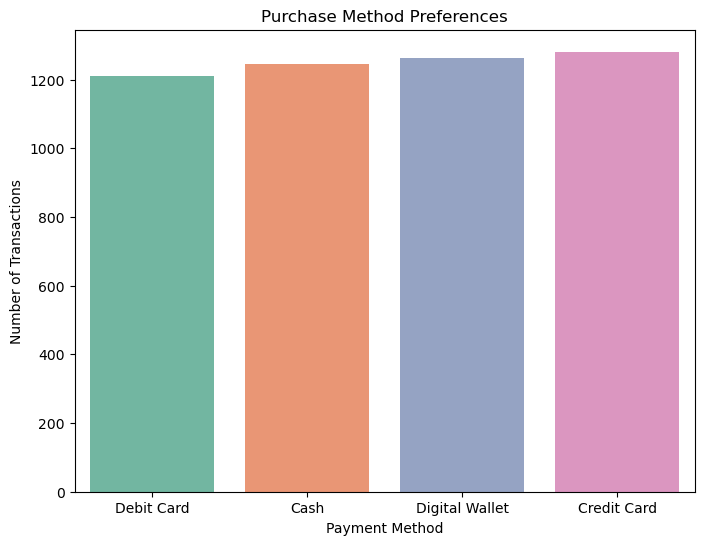

In [102]:
payment_counts=data['payment_method'].value_counts().sort_values() 
plt.figure(figsize=(8, 6))
sns.barplot(x=payment_counts.index, y=payment_counts.values,hue=payment_counts.index,legend=False, palette="Set2")
plt.xlabel("Payment Method")
plt.ylabel("Number of Transactions")
plt.title("Purchase Method Preferences")
plt.show()

**From the above plot we can see most transactions are made through credit card.**

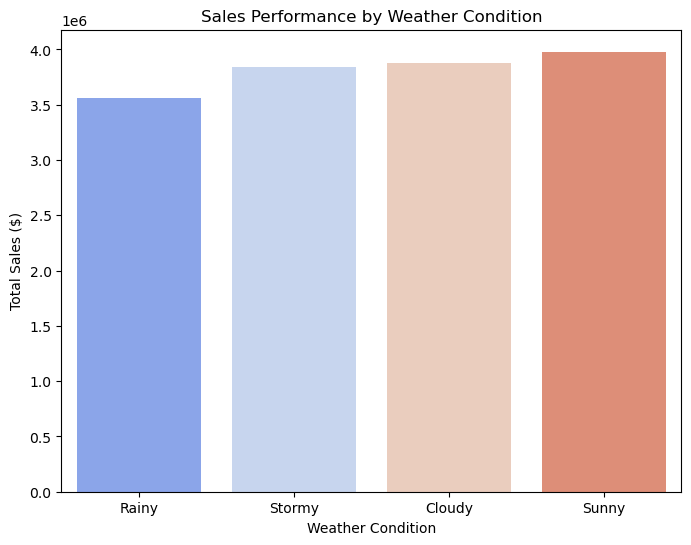

In [103]:
weather_sales = data.groupby("weather_conditions")["total_sales"].sum().sort_values() 
plt.figure(figsize=(8, 6))
sns.barplot(x=weather_sales.index, y=weather_sales.values,hue=weather_sales.index,legend=False, palette="coolwarm")
plt.xlabel("Weather Condition")
plt.ylabel("Total Sales ($)")
plt.title("Sales Performance by Weather Condition")
plt.show()

**Sunny weather led to higher sales compared to bad weather.**

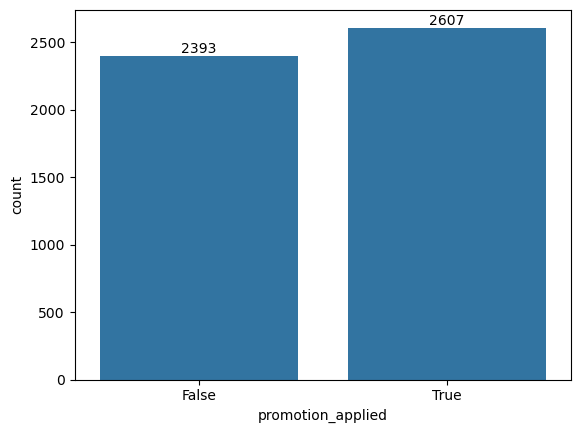

In [104]:
ax=sns.countplot(x='promotion_applied',data=data) 
for bar in ax.containers:
    ax.bar_label(bar)

**Promotion slightly influence purchase decisions but not overwhelmingliy.**

In [105]:
promo_total_sales=data[data['promotion_applied']==True]['total_sales'].sum() 
promo_total_sales

8062411.030000001

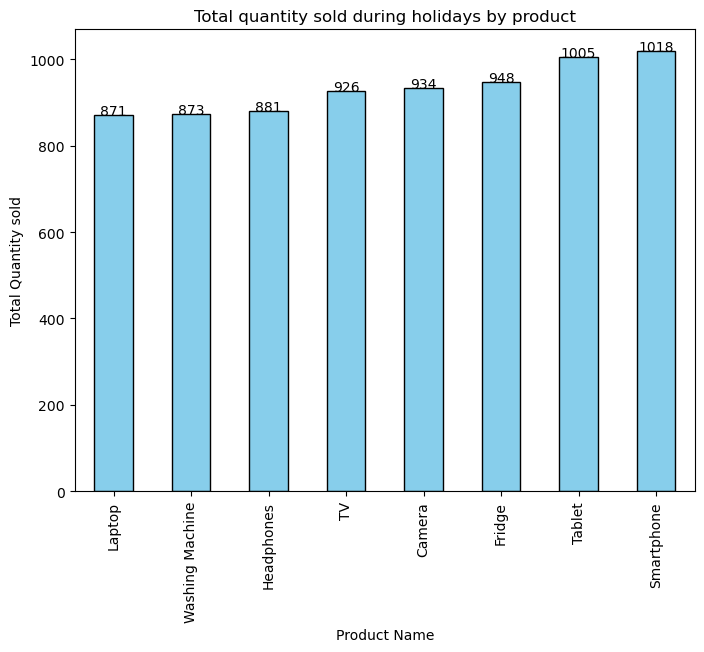

In [106]:
holiday_sales=data[data['holiday_indicator']==True] 
holiday_demand=holiday_sales.groupby('product_name')['quantity_sold'].sum().sort_values() 

#plotting a bar plot of total quantity sold during holidays by product 
plt.figure(figsize=(8,6)) 
ax=holiday_demand.plot(kind='bar',color='skyblue',edgecolor='black') 
for index,value in enumerate(holiday_demand):
    plt.text(index,value,f'{value}',ha='center',fontsize=10)

plt.title('Total quantity sold during holidays by product') 
plt.xlabel("Product Name")
plt.ylabel("Total Quantity sold")
plt.show()

In [107]:
#Best Selling products
best_product=data.groupby('product_name')['quantity_sold'].sum().sort_values(ascending=False) 
best_product

product_name
Fridge             1967
Tablet             1964
TV                 1926
Smartphone         1876
Camera             1873
Headphones         1816
Washing Machine    1807
Laptop             1685
Name: quantity_sold, dtype: int64

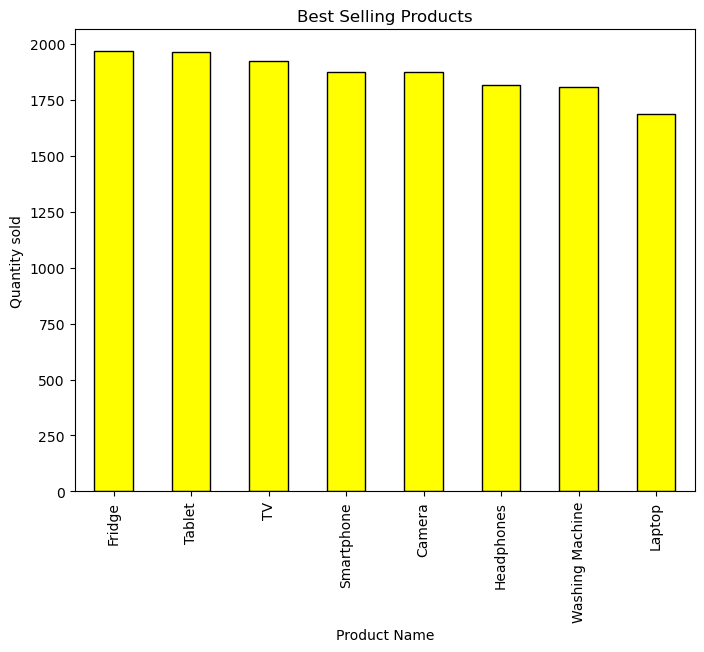

In [108]:
plt.figure(figsize=(8,6)) 
best_product.plot(kind='bar',color='Yellow',edgecolor='black') 
plt.title('Best Selling Products') 
plt.xlabel("Product Name")
plt.ylabel("Quantity sold")
plt.show()

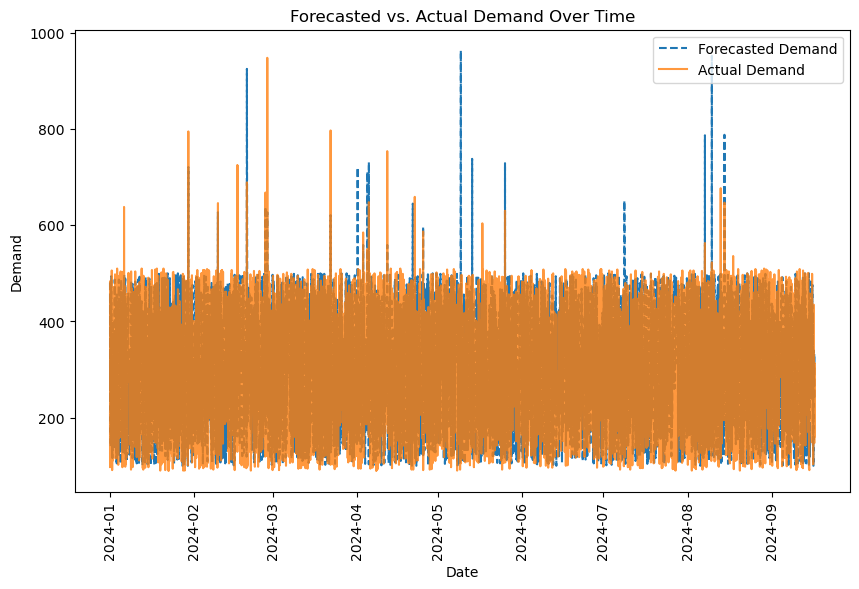

In [109]:
demand_trend = data.groupby("transaction_date")[["forecasted_demand", "actual_demand"]].sum()

plt.figure(figsize=(10, 6))
plt.plot(demand_trend.index, demand_trend["forecasted_demand"], label="Forecasted Demand", linestyle="dashed")
plt.plot(demand_trend.index, demand_trend["actual_demand"], label="Actual Demand", alpha=0.8)
plt.xlabel("Date")
plt.ylabel("Demand")
plt.title("Forecasted vs. Actual Demand Over Time")
plt.legend()
plt.xticks(rotation=90)
plt.show()

**Conclusion**

1) Expand high-performing stores and improve stock levels in underperforming locations.
2) Offer personalized discounts to high-spending customers for long-term retention.
3) Electronics category consistently outperform others, indicating strong consumer preference and potential areas for inventory optimization.